# Demo: CytoDataGen Effects

In [1]:
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.manifold import TSNE

from pyhere import here
from tqdm import tqdm

In [2]:
data_paths = [here(f"artifacts/demo/effect_{i}/cytodata.h5ad") for i in range(6)]

In [3]:
adatas = [ad.read_h5ad(path) for path in tqdm(data_paths)]

100%|██████████| 6/6 [00:00<00:00, 22.64it/s]


In [4]:
adatas[0].obs.head()

,sample_id,class_id,ct,ct_name
sample_0_cell_0,0,0,0,wobbly_muscle_cell
sample_0_cell_1,0,0,0,wobbly_muscle_cell
sample_0_cell_2,0,0,0,wobbly_muscle_cell
sample_0_cell_3,0,0,0,wobbly_muscle_cell
sample_0_cell_4,0,0,0,wobbly_muscle_cell


In [5]:
adatas[5].obs.head()

,sample_id,class_id,ct,ct_name,signal,batch_id,batch_shift
sample_0_cell_0,0,0,0,wobbly_muscle_cell,False,0,-0.725764
sample_0_cell_1,0,0,0,wobbly_muscle_cell,False,0,-0.725764
sample_0_cell_2,0,0,0,wobbly_muscle_cell,False,0,-0.725764
sample_0_cell_3,0,0,0,wobbly_muscle_cell,False,0,-0.725764
sample_0_cell_4,0,0,0,wobbly_muscle_cell,False,0,-0.725764


In [6]:
def filter_sample(adata, *args):
    return adata[adata.obs["sample_id"].isin(args)]

In [7]:
def embed_tsne(x, random_state=19, **kwargs):
    tsne = TSNE(n_components=2, random_state=random_state, **kwargs)
    x_tsne = tsne.fit_transform(x)
    df = pd.DataFrame(dict(tsne_1=x_tsne[:, 0], tsne_2=x_tsne[:, 1]))
    return df


def plot_tsne(adata: ad.AnnData, label="ct", as_categorical=True, title=None, ax=None):
    df = embed_tsne(adata.X)
    df["label"] = adata.obs[label].values
    if as_categorical:
        df["label"] = df["label"].astype("category")
    sns.scatterplot(df, x="tsne_1", y="tsne_2", hue="label", ax=ax)
    if title is not None:
        plt.title(title)
    return df

In [8]:
def plot_tsne_matrix(adata: ad.AnnData, group="sample_id", label="ct", col_wrap=5, add_legend=True, **kwargs):
    dfs = []
    for value in tqdm(adata.obs[group].unique()):
        a = adata[adata.obs[group] == value]
        df = embed_tsne(a.X).set_index(a.obs.index)
        df["label"] = a.obs[label].astype("category")
        df[group] = value
        dfs.append(df)
    df = pd.concat(dfs)
    g = sns.FacetGrid(df, col=group, col_wrap=col_wrap, hue="label", **kwargs)
    g.map_dataframe(sns.scatterplot, x="tsne_1", y="tsne_2")
    if add_legend:
        g.add_legend()
    return df

100%|██████████| 10/10 [00:44<00:00,  4.46s/it]


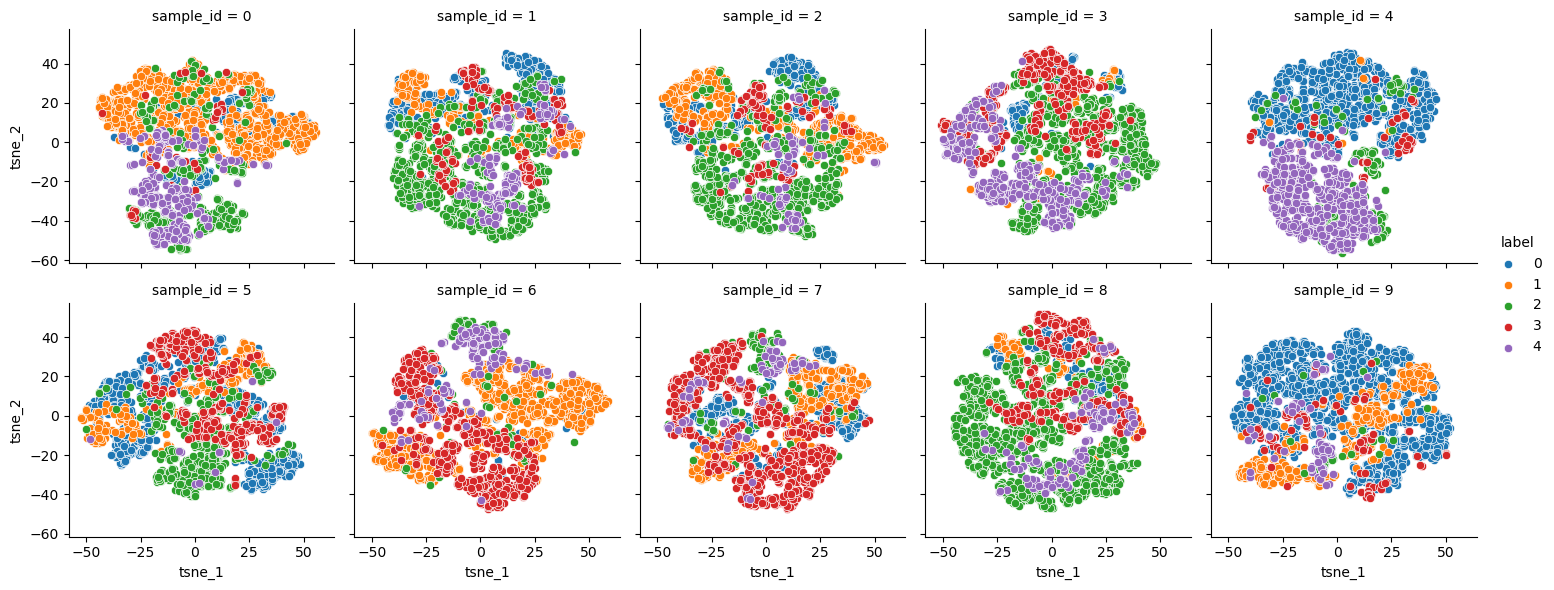

In [38]:
df = plot_tsne_matrix(filter_sample(adatas[0], *np.arange(10)), col_wrap=5)

In [50]:
def plot_shared_tsne_matrix(adata: ad.AnnData, group="sample_id", label="ct", col_wrap=5, add_legend=True, n_jobs=None, **kwargs):
    df = embed_tsne(adata.X, n_jobs=n_jobs).set_index(adata.obs.index)
    df = pd.concat([df, adata.obs], axis=1)

    g = sns.FacetGrid(df, col=group, col_wrap=col_wrap, hue=label, **kwargs)
    g.map_dataframe(sns.scatterplot, x="tsne_1", y="tsne_2")
    if add_legend:
        g.add_legend()
    return df

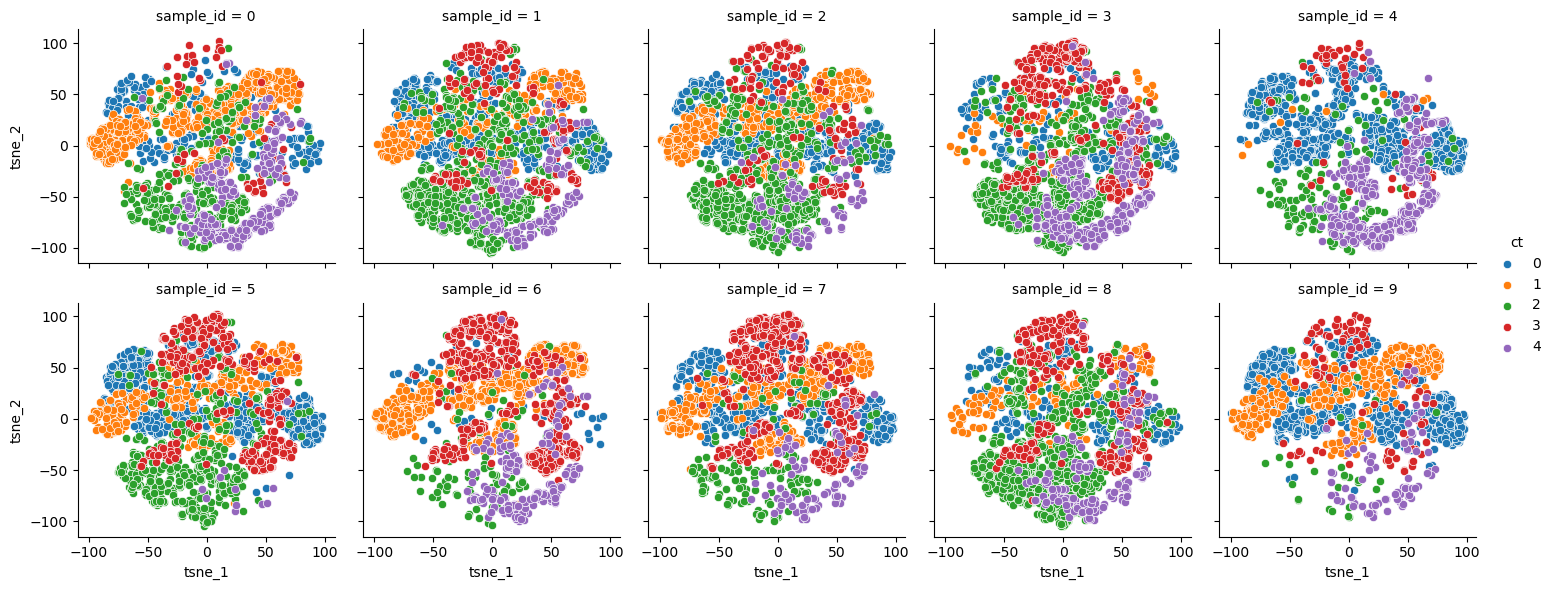

In [51]:
stsne_df_0 = plot_shared_tsne_matrix(adatas[0], n_jobs=4)

In [ ]:
stsne_df_2 = plot_shared_tsne_matrix(adatas[0])

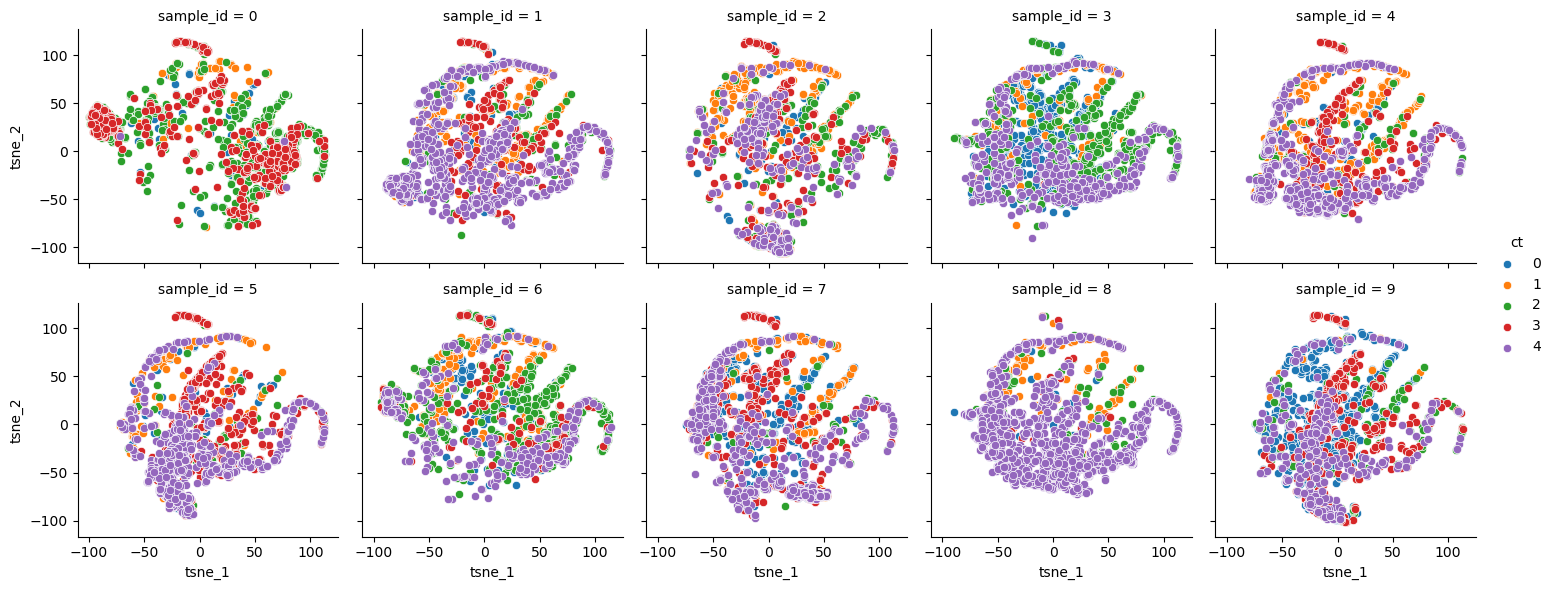

In [53]:
stsne_df_5 = plot_shared_tsne_matrix(adatas[5], n_jobs=4)

In [ ]:
def plot_s(adata: ad.AnnData, *, x=None, y=None):
    df = pd.concat(adata.to_df(), adata.obs)
    g = 
    sns.scatterplot()

In [54]:
adatas[0].to_df()

,cd_0,cd_1,cd_2,cd_3,cd_4
sample_0_cell_0,3.883408,5.758547,3.414323,4.357928,4.228236
sample_0_cell_1,3.242000,5.056272,3.251687,8.560188,6.662349
sample_0_cell_2,2.751808,5.339290,4.872040,5.883924,7.182207
sample_0_cell_3,4.094813,5.712397,2.640428,5.705038,4.758452
sample_0_cell_4,5.739575,7.661726,1.067927,3.497174,6.484739
...,...,...,...,...,...
sample_9_cell_1995,2.204211,2.588050,1.697779,7.118584,1.855560
sample_9_cell_1996,5.208427,3.678427,5.301125,0.512867,7.410199
sample_9_cell_1997,8.281048,3.414336,4.290451,2.954291,2.307370
sample_9_cell_1998,3.906619,2.734654,4.631387,4.784525,1.706627


In [42]:
adatas[0][:, ["cd_1", "cd_2"]]

View of AnnData object with n_obs × n_vars = 20000 × 2
    obs: 'sample_id', 'class_id', 'ct', 'ct_name'
    uns: 'config', 'labels', 'params', 'params_composition', 'params_expression'

In [40]:
adatas[0].var

""
cd_0
cd_1
cd_2
cd_3
cd_4
